In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv("Trading.csv")
data.head()

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6


In [31]:
import pandas as pd
data["Target_Variable"]=pd.Series(np.where(data['last_price'] > data['last_price'].shift(1), 1,0))
data.head()


,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f153,f154,f155,f156,f157,f158,f159,f160,f161,Target_Variable
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,0
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,0
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,0
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,...,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2,0
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,...,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6,0


In [32]:
data.sample(10)

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f153,f154,f155,f156,f157,f158,f159,f160,f161,Target_Variable
392,55466517,43102.7,2023-12-27 12:41:08.799759,0.000460,15533,-43.8,43.8,0.0,-3.3,-13.0,...,-159.3,659.7,-159.3,-159.3,659.7,659.7,-159.3,-159.3,659.7,0
7808,55459092,42738.8,2023-12-27 10:37:20.919474,0.000402,22960,-36.2,36.3,0.1,-1.9,-2.0,...,-56.1,403.8,-56.1,-56.1,403.8,403.8,-56.1,-56.1,403.8,1
3660,55463246,43204.0,2023-12-27 11:46:38.972506,0.000409,18802,-38.4,43.5,5.1,-1.9,12.2,...,-57.8,773.3,-57.8,-57.8,773.3,773.3,-57.8,-57.8,773.3,1
7517,55459383,42753.0,2023-12-27 10:42:11.875116,0.000401,22669,-36.0,38.8,2.8,1.1,-0.2,...,-41.9,380.3,-41.9,-41.9,380.3,380.3,-41.9,-41.9,380.3,0
8071,55458828,42705.3,2023-12-27 10:32:57.662643,0.000403,23223,-30.6,30.6,0.0,0.0,-1.6,...,-89.6,370.3,-89.6,-89.6,370.3,370.3,-89.6,-89.6,370.3,0
7075,55459825,42754.9,2023-12-27 10:49:34.938816,0.000399,22226,-33.4,34.3,0.9,6.8,8.2,...,-40.0,353.4,-40.0,-40.0,353.4,353.4,-40.0,-40.0,353.4,0
7616,55459284,42752.5,2023-12-27 10:40:32.772083,0.000401,22769,-35.2,35.1,-0.1,-2.5,1.6,...,-42.4,392.8,-42.4,-42.4,392.8,392.8,-42.4,-42.4,392.8,0
7607,55459293,42753.5,2023-12-27 10:40:41.930791,0.000401,22760,-36.0,36.1,0.1,-0.1,-1.4,...,-41.4,382.0,-41.4,-41.4,382.0,382.0,-41.4,-41.4,382.0,0
5559,55461345,42748.2,2023-12-27 11:14:55.87747,0.000398,20705,-33.6,33.5,-0.1,-3.4,1.3,...,-46.7,317.5,-46.7,-46.7,317.5,317.5,-46.7,-46.7,317.5,0
382,55466527,43093.4,2023-12-27 12:41:18.60732,0.000460,15522,-34.4,34.4,0.0,-9.5,-12.8,...,-168.6,650.4,-168.6,-168.6,650.4,650.4,-168.6,-168.6,650.4,1


In [33]:
data.describe()

,id,last_price,f1,f2,f3,f4,f5,f6,f7,f8,...,f153,f154,f155,f156,f157,f158,f159,f160,f161,Target_Variable
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.546190e+07,42938.580560,0.000414,20149.80990,-40.236010,42.252370,2.016360,0.523120,1.103560,2.29049,...,-74.606490,533.201440,-74.606490,-74.606490,533.201440,533.201440,-74.606490,-74.606490,533.201440,0.322300
std,2.890879e+03,205.486455,0.000018,2897.95985,7.212493,9.346334,5.339766,12.883223,17.590602,24.03562,...,46.736091,177.929894,46.736091,46.736091,177.929894,177.929894,46.736091,46.736091,177.929894,0.467381
min,5.545690e+07,42659.500000,0.000397,15139.00000,-57.800000,15.000000,-27.100000,-51.900000,-59.900000,-75.70000,...,-196.300000,301.200000,-196.300000,-196.300000,301.200000,301.200000,-196.300000,-196.300000,301.200000,0.000000
25%,5.545940e+07,42747.400000,0.000400,17642.00000,-46.000000,35.700000,0.000000,-5.600000,-8.300000,-11.00000,...,-104.825000,359.100000,-104.825000,-104.825000,359.100000,359.100000,-104.825000,-104.825000,359.100000,0.000000
50%,5.546190e+07,42835.850000,0.000408,20146.00000,-38.200000,40.500000,0.800000,0.000000,0.100000,0.40000,...,-61.200000,450.800000,-61.200000,-61.200000,450.800000,450.800000,-61.200000,-61.200000,450.800000,0.000000
75%,5.546441e+07,43145.225000,0.000417,22652.25000,-34.500000,48.500000,3.900000,5.725000,8.800000,12.20000,...,-37.700000,712.325000,-37.700000,-37.700000,712.325000,712.325000,-37.700000,-37.700000,712.325000,1.000000
max,5.546691e+07,43262.000000,0.000463,25196.00000,-22.100000,124.200000,85.300000,135.000000,135.700000,179.00000,...,49.400000,831.300000,49.400000,49.400000,831.300000,831.300000,49.400000,49.400000,831.300000,1.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 165 entries, id to Target_Variable
dtypes: float64(136), int64(28), object(1)
memory usage: 12.6+ MB


In [35]:
data.dtypes

id                   int64
last_price         float64
created_at          object
f1                 float64
f2                   int64
                    ...   
f158               float64
f159               float64
f160               float64
f161               float64
Target_Variable      int64
Length: 165, dtype: object

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 165 entries, id to Target_Variable
dtypes: float64(136), int64(28), object(1)
memory usage: 12.6+ MB


In [37]:
data.shape

(10000, 165)

In [38]:
object_data=data.select_dtypes(include="object")
object_data.head()

,created_at
0,2023-12-27 12:47:41.916971
1,2023-12-27 12:47:40.693372
2,2023-12-27 12:47:39.968797
3,2023-12-27 12:47:38.919784
4,2023-12-27 12:47:37.881533


In [39]:
#  standard Scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
temp=data.drop("created_at",axis=1)
scaler.fit(temp)
scaled_data=scaler.transform(temp)
# scaled_data not in data frames so convert into dataframe
scaled_data=pd.DataFrame(scaled_data,columns=temp.columns)
scaled_data.head()


,id,last_price,f1,f2,f3,f4,f5,f6,f7,f8,...,f153,f154,f155,f156,f157,f158,f159,f160,f161,Target_Variable
0,1.731609,0.971497,2.679224,-1.729168,-0.397107,0.079996,-0.396359,-0.413203,-0.352681,-0.274211,...,-1.052633,0.910508,-1.052633,-1.052633,0.910508,0.910508,-1.052633,-1.052633,0.910508,-0.689622
1,1.731263,0.971497,2.679224,-1.728823,-0.397107,0.079996,-0.396359,-0.405441,-0.352681,-0.195157,...,-1.052633,0.910508,-1.052633,-1.052633,0.910508,0.910508,-1.052633,-1.052633,0.910508,-0.689622
2,1.730917,0.971497,2.679224,-1.728478,0.393228,0.079996,0.671157,-0.188093,-0.096850,-0.195157,...,-1.052633,0.910508,-1.052633,-1.052633,0.910508,0.910508,-1.052633,-1.052633,0.910508,-0.689622
3,1.730571,0.971497,2.679224,-1.728133,0.393228,-0.519200,-0.377631,-0.327816,-0.415217,-0.519692,...,-1.052633,0.910508,-1.052633,-1.052633,0.910508,0.910508,-1.052633,-1.052633,0.910508,-0.689622
4,1.730225,0.944243,2.679224,-1.727788,0.088186,-0.615499,-0.958210,-0.327816,-0.597142,-0.519692,...,-1.172461,0.879034,-1.172461,-1.172461,0.879034,0.879034,-1.172461,-1.172461,0.879034,-0.689622


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'last_price'}>],
       [<Axes: title={'center': 'f1'}>, <Axes: title={'center': 'f2'}>],
       [<Axes: title={'center': 'f3'}>, <Axes: >]], dtype=object)

<Figure size 1000x500 with 0 Axes>

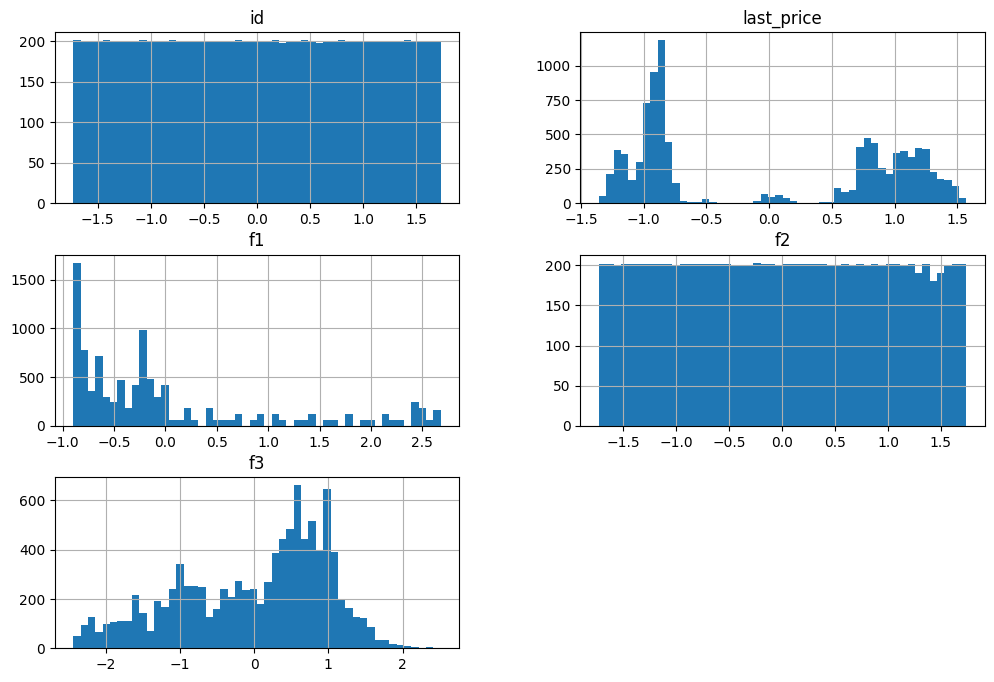

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
visual=scaled_data.iloc[:,:5]
visual.hist(figsize=(12, 8), bins=50)


<Axes: title={'center': 'Standard Deviations'}, xlabel='X-axis', ylabel='Y-Axis'>

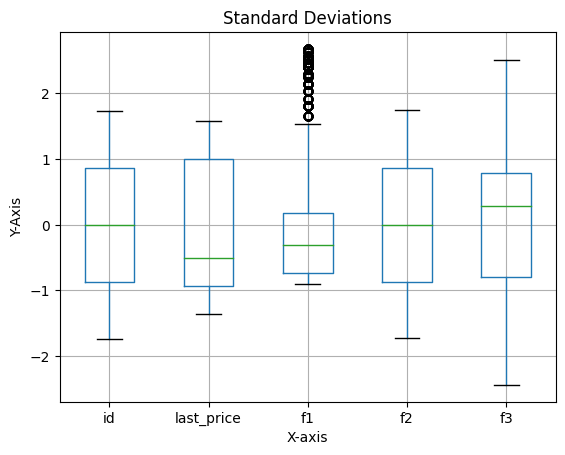

In [41]:
plt.xlabel("X-axis")
plt.ylabel("Y-Axis")
plt.title("Standard Deviations")
visual.boxplot()


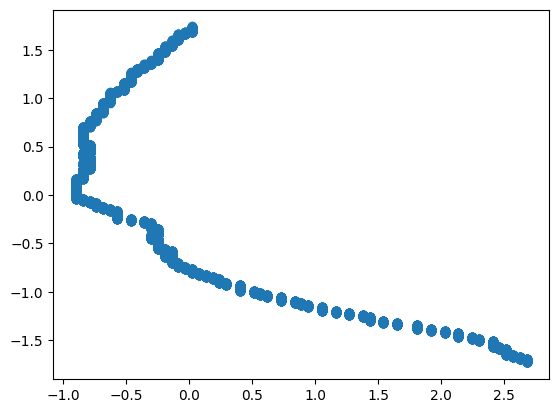

In [42]:
plt.scatter(visual["f1"],visual["f2"])


In [43]:
np.round(scaled_data.describe())

,id,last_price,f1,f2,f3,f4,f5,f6,f7,f8,...,f153,f154,f155,f156,f157,f158,f159,f160,f161,Target_Variable
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-1.0,-2.0,-2.0,-3.0,-5.0,-4.0,-3.0,-3.0,...,-3.0,-1.0,-3.0,-3.0,-1.0,-1.0,-3.0,-3.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-1.0
75%,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,2.0,2.0,3.0,2.0,3.0,9.0,16.0,10.0,8.0,7.0,...,3.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,1.0


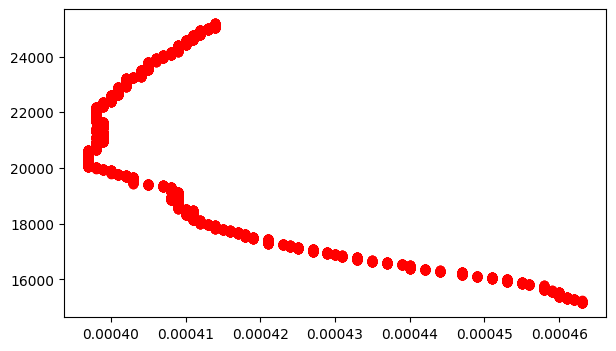

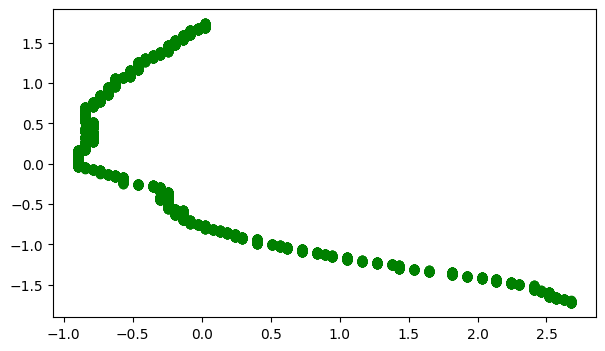

In [44]:
plt.figure(figsize=(7, 4))
# plt.subplot(2, 3, 1)
plt.scatter(data['f1'], data['f2'], color="red")
# plt.title('Before Scaling')
# plt.xlabel('feature1')
# plt.ylabel('feature2')

plt.figure(figsize=(7, 4))
# plt.subplot(2, 3, 1)
plt.scatter(scaled_data['f1'], scaled_data['f2'], color="Green")
# plt.title('After Scaling')
# plt.xlabel('feature1')
# plt.ylabel('feature2')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'last_price'}>],
       [<Axes: title={'center': 'f1'}>, <Axes: title={'center': 'f2'}>],
       [<Axes: title={'center': 'f3'}>, <Axes: >]], dtype=object)

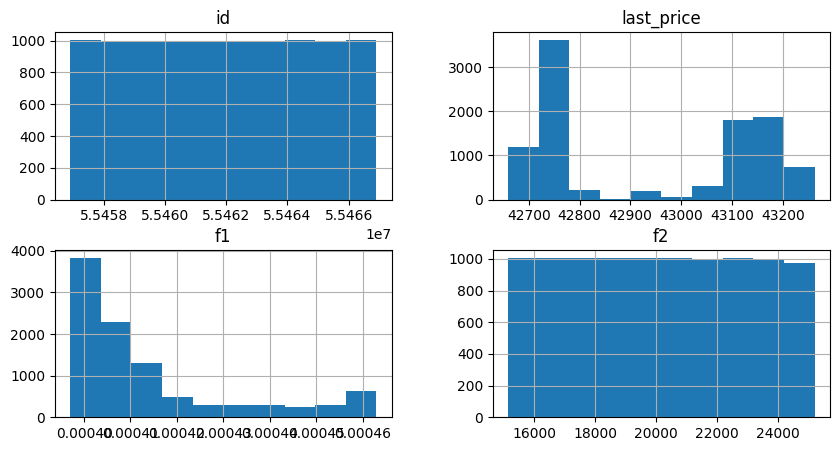

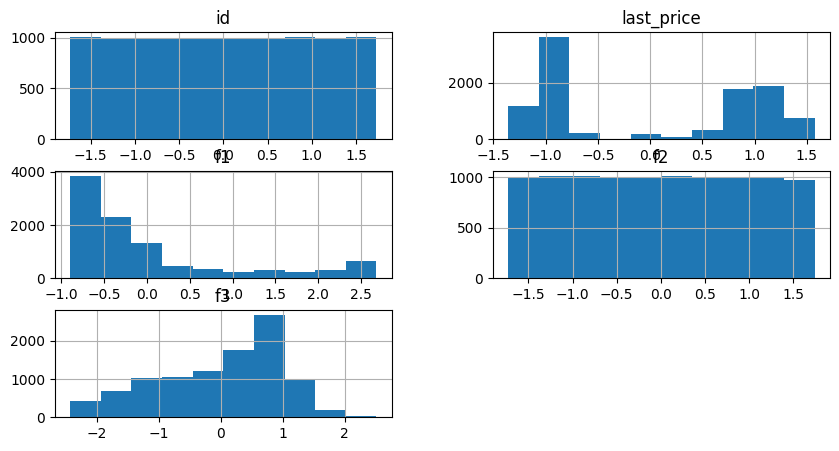

In [45]:
data.iloc[:,:5].hist(figsize=(10,5),bins=10)
visual.hist(figsize=(10,5),bins=10)


<ipython-input-46-672fa584b762>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:, :5]["f1"], label="F1", shade=True)
<ipython-input-46-672fa584b762>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:, :5]["f2"], label="F2", shade=True, color="red")
<ipython-input-46-672fa584b762>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(visual["f1"], label="F1", shade=True)
<ipython-input-46-672fa584b762>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(visual["f2"], label="F2", shade

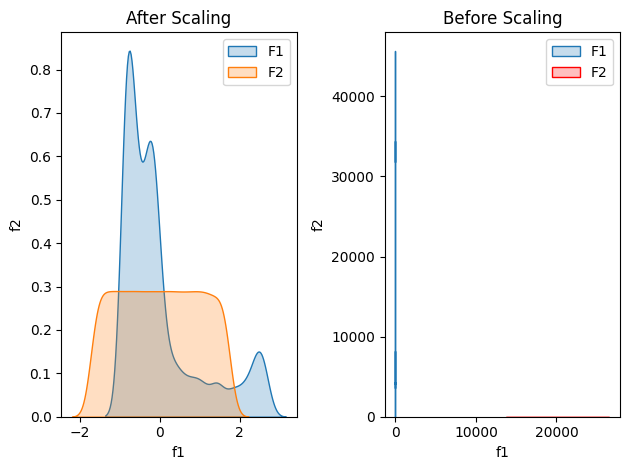

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplot(1, 2, 2)
plt.title("Before Scaling")
sns.kdeplot(data.iloc[:, :5]["f1"], label="F1", shade=True)
sns.kdeplot(data.iloc[:, :5]["f2"], label="F2", shade=True, color="red")
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()


plt.subplot(1, 2, 1)
plt.title("After Scaling")
sns.kdeplot(visual["f1"], label="F1", shade=True)
sns.kdeplot(visual["f2"], label="F2", shade=True)
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-47-ea7fa6b6614a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["f2"],label="feature",shade=True)


<Axes: xlabel='f2', ylabel='Density'>

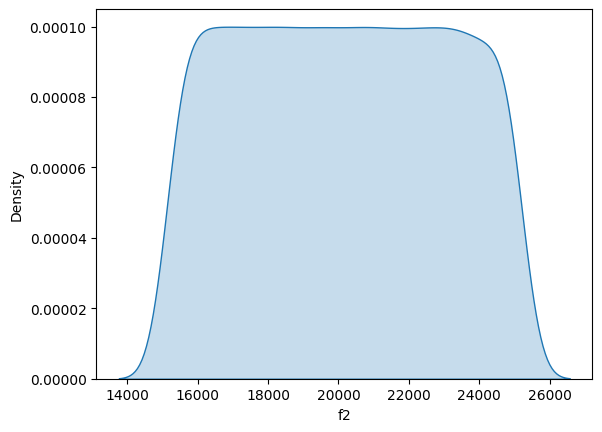

In [47]:
sns.kdeplot(data["f2"],label="feature",shade=True)

Used Standard Deviations when you used KNN , K-nearest Neigbour , Gradient Decent, Artificial Neural Network and PCA

In [48]:
#  Handle missing values
data.fillna(data.mean() , inplace=True)


# Splitting
data.drop("created_at",axis=1,inplace=True)
features=data.drop("Target_Variable",axis=1)
labels=data["Target_Variable"].copy()
features_x,features_y,labels_x,labels_y=train_test_split(features,labels,test_size=0.2,random_state=7)

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import accuracy_score
# tree=DecisionTreeRegressor()
# tree.fit(features_x,labels_x)
# result=tree.predict(features_y)

#  For Classification



<ipython-input-48-5a8fb9f90d1f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean() , inplace=True)


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
tree.fit(features_x, labels_x)
result = tree.predict(features_y)

accuracy = accuracy_score(labels_y, result)

print("Accuracy using Decision Tree Classifier: {:.2f}%".format(accuracy * 100))


Accuracy using Decision Tree Classifier: 56.15%


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(features_x, labels_x)
result_logistic_regression = logistic_regression_model.predict(features_y)

accuracy_logistic_regression = accuracy_score(labels_y, result_logistic_regression)

print("Accuracy using Logistic Regression: {:.2f}%".format(accuracy_logistic_regression * 100))


Accuracy using Logistic Regression: 68.45%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC()
svm_classifier.fit(features_x, labels_x)
result_svm = svm_classifier.predict(features_y)


accuracy_svm = accuracy_score(labels_y, result_svm)

print("Accuracy using SVM Classifier: {:.2f}%".format(accuracy_svm * 100))


Accuracy using SVM Classifier: 68.55%


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(features_x, labels_x)
result_rf = random_forest_classifier.predict(features_y)


accuracy_rf = accuracy_score(labels_y, result_rf)

print("Accuracy using Random Forest Classifier: {:.2f}%".format(accuracy_rf * 100))


Accuracy using Random Forest Classifier: 63.40%


In [53]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(features_x, labels_x)
result_xgb = xgb_classifier.predict(features_y)

accuracy_xgb = accuracy_score(labels_y, result_xgb)

print("Accuracy using XGBoost Classifier: {:.2f}%".format(accuracy_xgb * 100))


Accuracy using XGBoost Classifier: 63.45%


In [54]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np



# # LinearRegression
# linear_reg = LinearRegression()
# linear_reg.fit(features_x, labels_x)
# result_linear = linear_reg.predict(features_y)



In [55]:
from sklearn.metrics import r2_score

# Assuming 'result' is the predicted values
r_squared = r2_score(labels_y, result)
print("Using Decision Tree, The accuracy is: ",r_squared*100)


Using Decision Tree, The accuracy is:  -104.45964486502052


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit(data)
minmax_data=minmax.transform(data)
# convert into DataFrame
minmax_data=pd.DataFrame(minmax_data,columns=data.columns)
minmax_data.head()

In [ ]:
minmax_data.describe()